In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance as pn   # ← PyNance


In [2]:
# Load your stock data (YOU MUST PLACE YOUR FILE IN THE SAME FOLDER)
df = pd.read_csv("..\src\MSFT.csv")

# Standardize column names (important)
df.columns = df.columns.str.title()

# Make sure required columns exist
required_cols = ["Open", "High", "Low", "Close", "Volume"]
print("Found columns:", df.columns.tolist())

missing = [col for col in required_cols if col not in df.columns]
if missing:
    print("❌ Missing columns:", missing)
else:
    print("✅ All required columns found.")

# Convert Date column
if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values("Date")
else:
    print("⚠️ No Date column found.")


Found columns: ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
✅ All required columns found.


<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\hp\AppData\Local\Temp\ipykernel_15284\2978633500.py:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv("..\src\MSFT.csv")


In [3]:
# Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)

# RSI
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)

# MACD
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(
    df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2
)

# Stochastic Oscillator
df['slowk'], df['slowd'] = talib.STOCH(
    df['High'], df['Low'], df['Close'],
    fastk_period=14,
    slowk_period=3,
    slowd_period=3
)

print("✅ Technical indicators calculated!")
df.head()


✅ Technical indicators calculated!


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,slowk,slowd
0,2009-01-02,14.872976,14.924187,14.170662,14.287715,50084000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,15.011971,15.121707,14.675444,14.777866,61475200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,15.187551,15.363130,15.077815,15.180236,58083400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,14.273087,14.843718,14.251139,14.770560,72709900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,14.719351,14.770561,14.302350,14.360876,70255400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Daily returns
# FIXED: Using the standard pandas method .pct_change()
df["Returns"] = df["Close"].pct_change()

# Rolling volatility (20-day)
df["Volatility_20"] = df["Returns"].rolling(20).std()

# Sharpe Ratio (simplified)
# Note: This is an unannualized, simplified 20-day Sharpe Ratio
df["Sharpe"] = df["Returns"].rolling(20).mean() / df["Returns"].rolling(20).std()

# Cumulative returns
df["Cumulative_Returns"] = (1 + df["Returns"]).cumprod()

print("✅ Financial metrics added using pandas!")
print(df.tail())

✅ Financial metrics added using pandas!
           Date       Close        High         Low        Open    Volume  \
3769 2023-12-22  369.767883  370.360181  367.921911  368.879451  17107500   
3770 2023-12-26  369.846832  372.097540  368.701731  370.182461  12673100   
3771 2023-12-27  369.264465  370.241738  368.020642  368.889342  14905400   
3772 2023-12-28  370.458862  371.623696  369.353256  370.547702  14327000   
3773 2023-12-29  371.209198  372.314805  368.682088  371.169703  18730800   

          SMA_20      SMA_50      EMA_20     RSI_14  ...  MACD_hist  \
3769  368.730389  355.078464  366.580145  56.363342  ...  -1.034664   
3770  368.535426  356.018111  366.891259  56.447998  ...  -0.858438   
3771  368.109468  356.849368  367.117278  55.591261  ...  -0.773200   
3772  367.933260  357.715942  367.435524  57.031664  ...  -0.634309   
3773  367.791606  358.635943  367.794922  57.954296  ...  -0.495963   

      upper_band  middle_band  lower_band      slowk      slowd   Retu

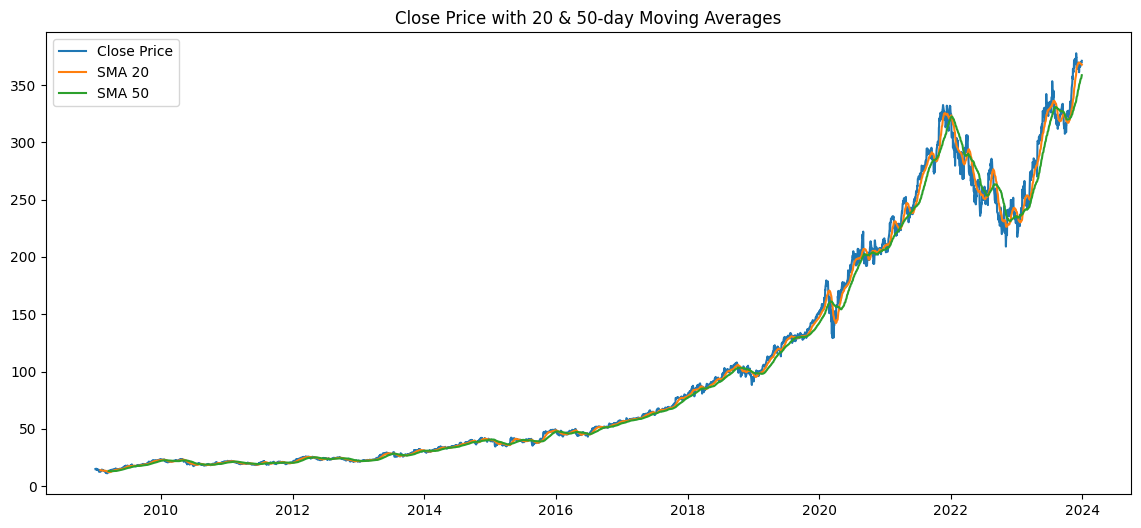

In [6]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.title("Close Price with 20 & 50-day Moving Averages")
plt.legend()
plt.show()


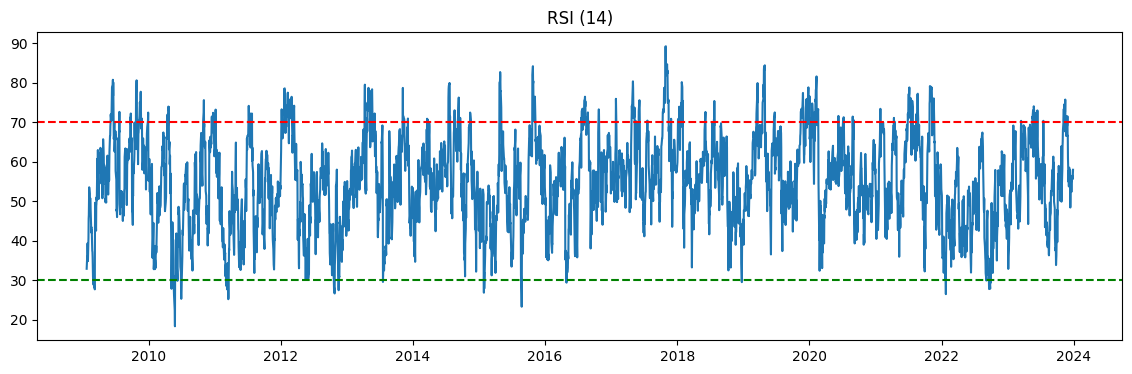

In [7]:
plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14)")
plt.show()


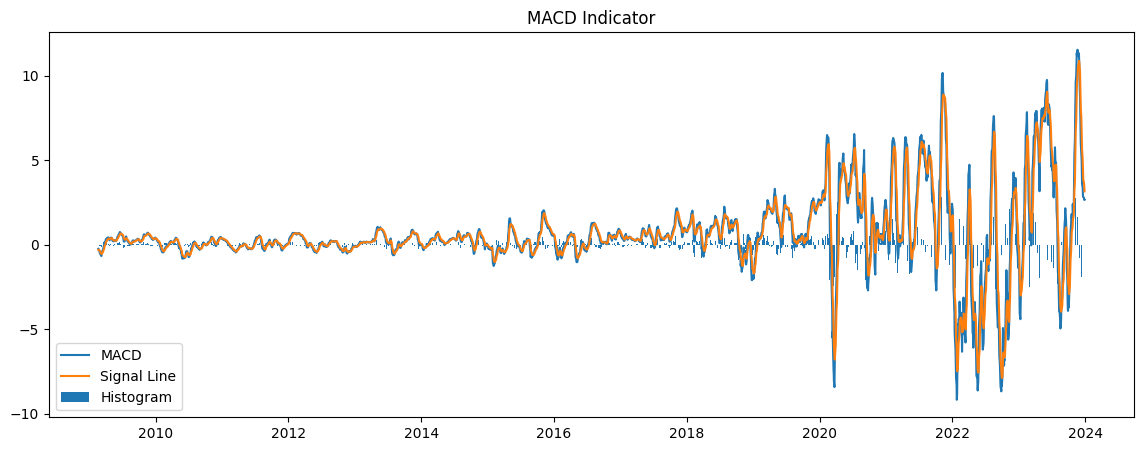

In [8]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal Line")
plt.bar(df["Date"], df["MACD_hist"], label="Histogram")
plt.title("MACD Indicator")
plt.legend()
plt.show()


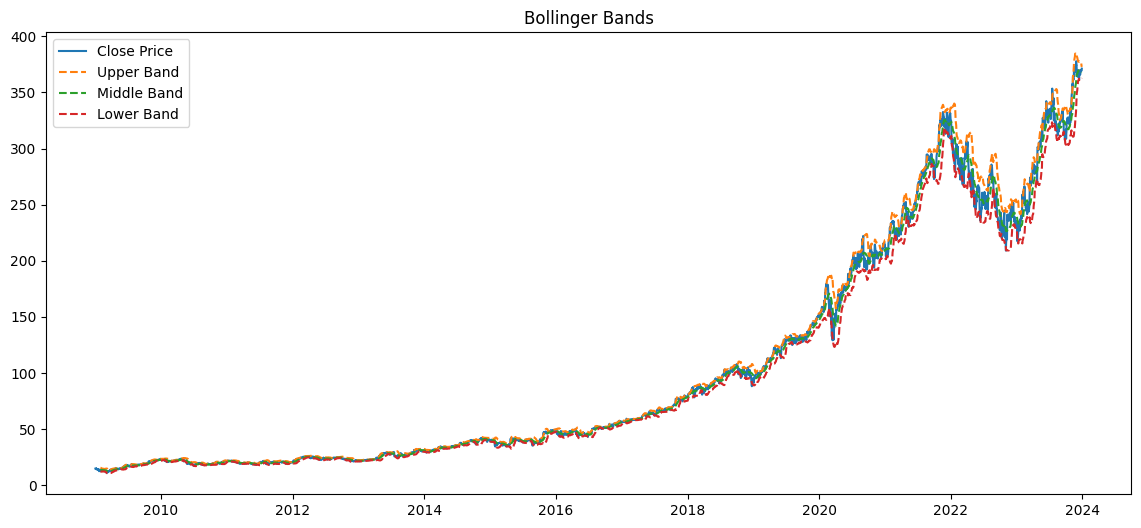

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["upper_band"], label="Upper Band", linestyle="--")
plt.plot(df["Date"], df["middle_band"], label="Middle Band", linestyle="--")
plt.plot(df["Date"], df["lower_band"], label="Lower Band", linestyle="--")
plt.title("Bollinger Bands")
plt.legend()
plt.show()


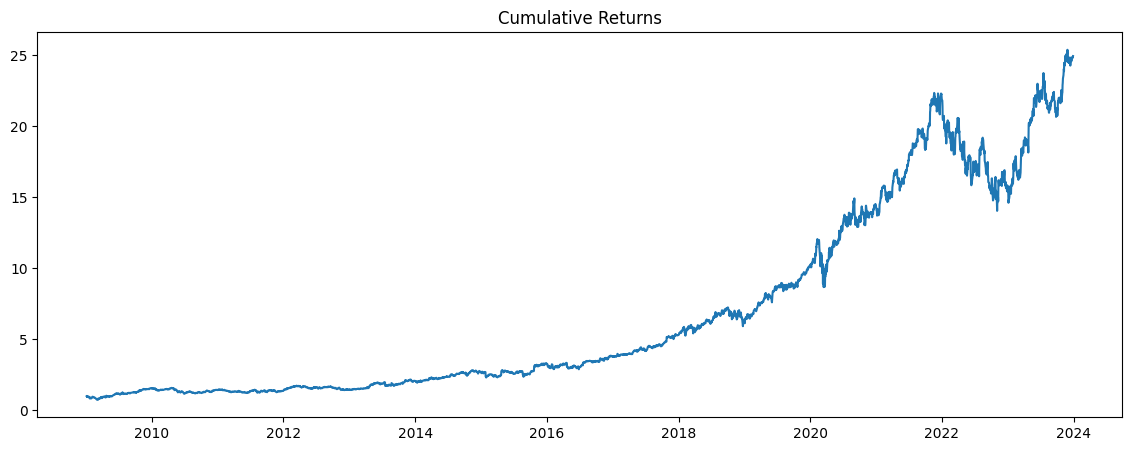

In [10]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Cumulative_Returns"])
plt.title("Cumulative Returns")
plt.show()


In [11]:
summary = df[[
    "Close", "SMA_20", "SMA_50", "RSI_14",
    "MACD", "MACD_signal", "Volatility_20", "Sharpe"
]].tail(10)

summary


,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,Volatility_20,Sharpe
3764,365.967346,369.272830,350.755914,53.091054,3.606265,5.621327,0.011851,-0.055800
3765,367.862671,369.411031,351.665138,54.862791,3.409496,5.178960,0.011281,0.038801
3766,368.464844,369.204716,352.535966,55.438661,3.264514,4.796071,0.010255,-0.049394
3767,365.858795,369.083791,353.382848,52.327210,2.905832,4.418023,0.010046,-0.027997
3768,368.741272,368.871060,354.207977,55.314548,2.821640,4.098747,0.009765,-0.054070
3769,369.767883,368.730389,355.078464,56.363342,2.805416,3.840081,0.009791,-0.034030
3770,369.846832,368.535426,356.018111,56.447998,2.767033,3.625471,0.009759,-0.049067
3771,369.264465,368.109468,356.849368,55.591261,2.658971,3.432171,0.009391,-0.116889
3772,370.458862,367.933260,357.715942,57.031664,2.639285,3.273594,0.009192,-0.047104
3773,371.209198,367.791606,358.635943,57.954296,2.653640,3.149603,0.009207,-0.036885
